# Задание 1
# Ляшук Александр - 14 ПМИ
## Данные - MAGIC Gamma Telescope
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope
### Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import datetime

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, normalize

from pylab import rcParams

warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 8, 5

### Выгрузим данные в Pandas DataFrame и посмотрим на них

In [2]:
data = pd.read_csv('../data/magic04.data',header=None)
data.columns = ['Length', 'Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','class']

In [3]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Описание данных

`1.  Length:  continuous  # major axis of ellipse [mm] `  
`2.  Width:   continuous  # minor axis of ellipse [mm] `  
`3.  Size:    continuous  # 10-log of sum of content of all pixels [in #phot] `  
`4.  Conc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]`  
`5.  Conc1:   continuous  # ratio of highest pixel over fSize  [ratio] `  
`6.  Asym:    continuous  # distance from highest pixel to center, projected onto major axis [mm] `  
`7.  M3Long:  continuous  # 3rd root of third moment along major axis  [mm] `  
`8.  M3Trans: continuous  # 3rd root of third moment along minor axis  [mm] `   
`9.  Alpha:   continuous  # angle of major axis with vector to origin [deg] `  
`10. Dist:    continuous  # distance from origin to center of ellipse [mm] `  
`11. class:    g,h         # gamma (signal), hadron (background) `  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
Length     19020 non-null float64
Width      19020 non-null float64
Size       19020 non-null float64
Conc       19020 non-null float64
Conc1      19020 non-null float64
Asym       19020 non-null float64
M3Long     19020 non-null float64
M3Trans    19020 non-null float64
Alpha      19020 non-null float64
Dist       19020 non-null float64
class      19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


- Данные не содержат пропусков

In [5]:
data.describe()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
data['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

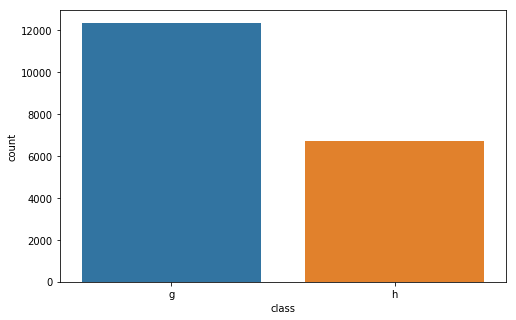

In [9]:
sns.countplot(data['class'])

#### Итого:
- `12332` - класс g
- `6688` - класс h

**Cледовательно:** выборка несбалансированная

### Матрица корреляции признаков

In [8]:
data.corr()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist
Length,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
Width,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
Size,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
Conc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
Conc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
Asym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
M3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
M3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
Alpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
Dist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


### Визуализация матрицы корреляции для наглядности

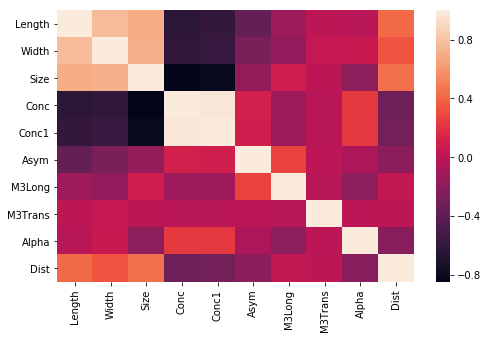

In [10]:
sns.heatmap(data.iloc[:,:-1].corr())

- Видно, что признаки **`Conc`** и **`Conc1`** коррелируют очень сильно - **0.97**
- Кроме того, **`Length`**, **`Width`** и **`Size`** так же сильно коррелируют

### Построим, как связаны между собой разные признаки
Для этого, посмотрим на диаграммы рассеяния и распределения признаков

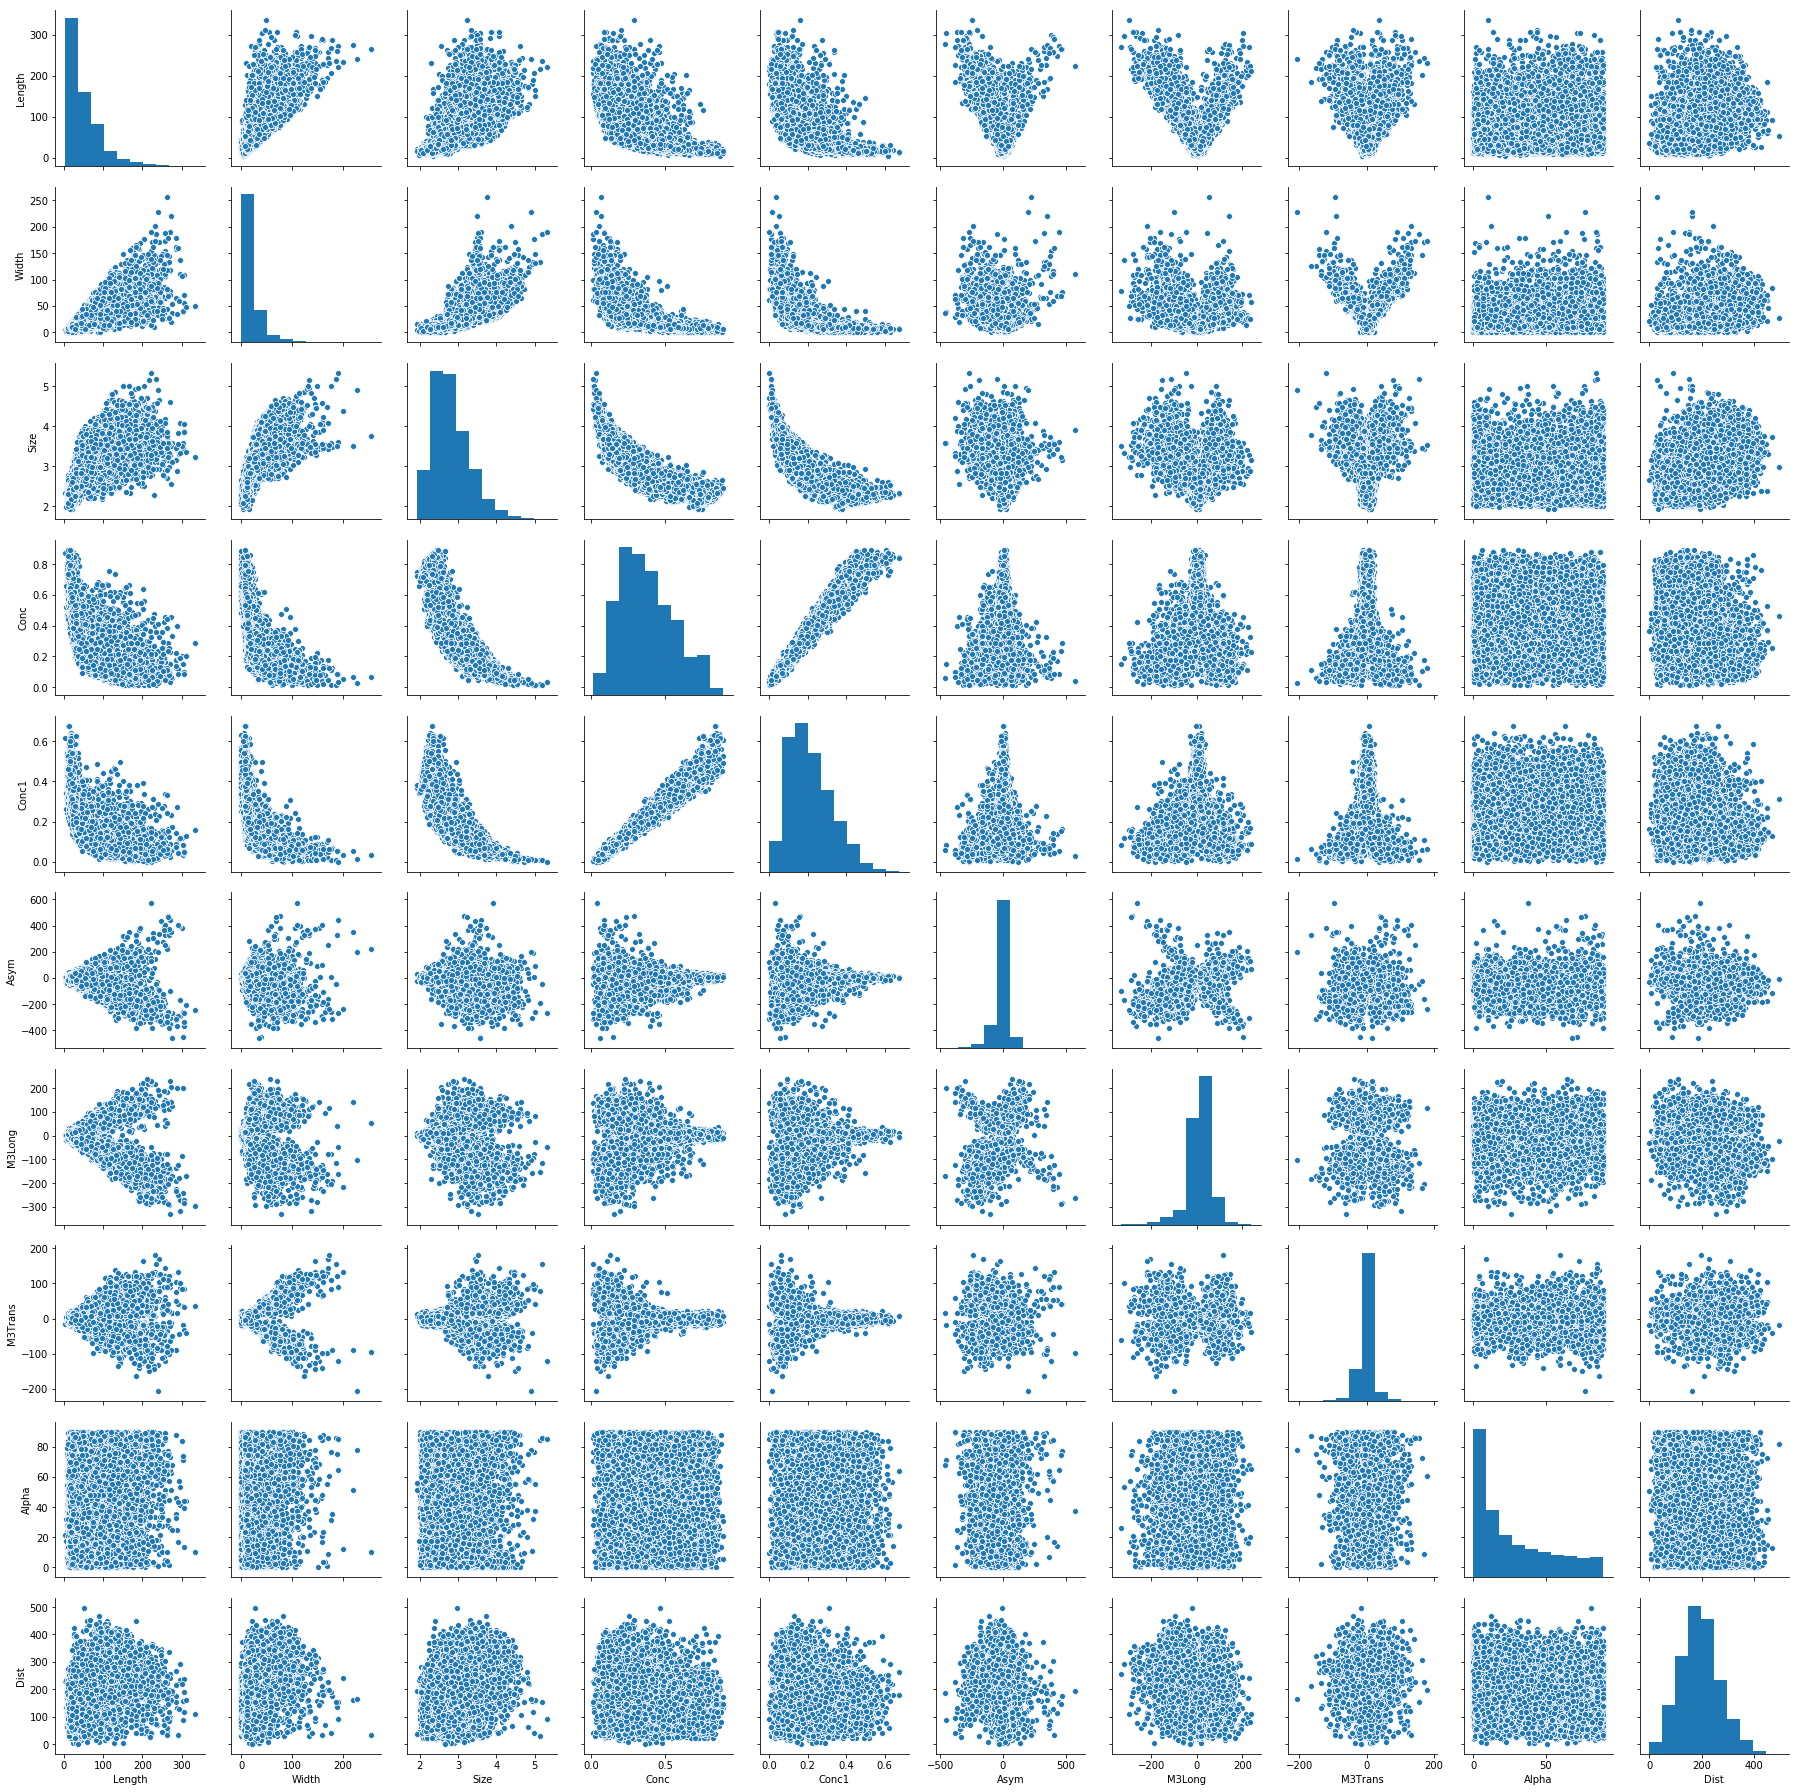

In [11]:
sns.pairplot(data.iloc[:,:-1])

### Например, диаграмма рассеяния для длины и ширины

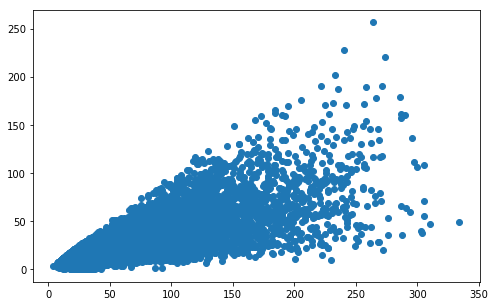

In [12]:
plt.plot(data['Length'], data['Width'], 'o', alpha = 1)

### Или, например, диаграмма рассеяния с соответствующими классами

Length Width


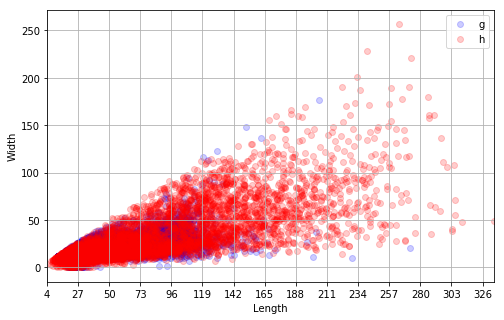

Length Size


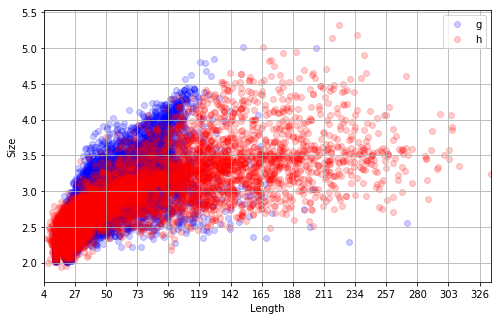

Width Size


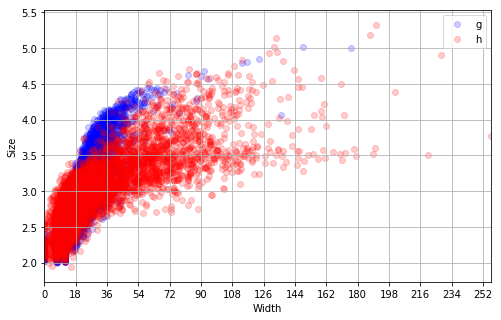

Width Conc


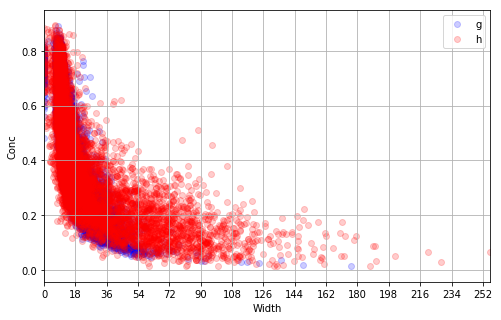

In [17]:
for i in range(0,len(data.columns))[:2]:
    for j in range(i+1,len(data.columns) -1 )[:2]:
        print(data.columns[i],data.columns[j])
        plt.scatter(data[data['class'] == 'g'][data.columns[i]],
            data[data['class'] == 'g'][data.columns[j]],
            alpha = 0.2,
            label = 'g',
            color = 'b')

        plt.scatter(data[data['class'] == 'h'][data.columns[i]],
                    data[data['class'] == 'h'][data.columns[j]],
                    alpha = 0.2,
                    label = 'h',
                    color = 'r')

        max_value = data[data.columns[i]].max()
        min_value = data[data.columns[i]].min()
        plt.xlabel(data.columns[i])
        plt.xticks(range(int(min_value),int(max_value),int(max_value/15) + 1))
        plt.xlim(min_value, max_value)
        plt.ylabel(data.columns[j])
        plt.legend()
        plt.grid()
        plt.show()

# Задача

- Все признаки количественные
- Пропусков в данных нет  

**Для начала не будем делать препроцессинг, чтобы посмотреть на результаты без предобработки, а затем сравним с результатами на предобработанных данных. **

### Разделим данные на обучающую и тестовую выборку

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

### KNN
`k_neighbors = [1,2,3,4,5,10,15,30,50,100,150,250,500]`

In [20]:
scores = []
err_train = []
err_test = []
k_neighbors = [1,2,3,4,5,10,15,30,50,100,150,250,500]
for k in k_neighbors:
    start_time = datetime.datetime.now()
    
    model = KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_pred,y_test))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))
    
    print('k = ' + str(k))
    print('Time elapsed: ' + str(datetime.datetime.now() - start_time))
    print('Train error: ' + str(err_train[-1]))
    print('Test error: ' + str(err_test[-1]))
    print('Accuracy score: ' + str(scores[-1]))
    print()

k = 1
Time elapsed: 0:00:00.280081
Train error: 0.0
Test error: 0.21459295841962722
Accuracy score: 0.7854070415803728

k = 2
Time elapsed: 0:00:00.367446
Train error: 0.1301891234403202
Test error: 0.21443364664648717
Accuracy score: 0.7855663533535128

k = 3
Time elapsed: 0:00:00.374952
Train error: 0.11567134897590835
Test error: 0.19882109287876373
Accuracy score: 0.8011789071212363

k = 4
Time elapsed: 0:00:00.363997
Train error: 0.15585027073687516
Test error: 0.19706866337422335
Accuracy score: 0.8029313366257766

k = 5
Time elapsed: 0:00:00.460231
Train error: 0.14659028486227732
Test error: 0.18735064521268122
Accuracy score: 0.8126493547873188

k = 10
Time elapsed: 0:00:00.578618
Train error: 0.17397787020324884
Test error: 0.18926238649036164
Accuracy score: 0.8107376135096384

k = 15
Time elapsed: 0:00:00.619031
Train error: 0.17680295063956683
Test error: 0.1854389039350008
Accuracy score: 0.8145610960649992

k = 30
Time elapsed: 0:00:00.719139
Train error: 0.1902220827120

### График доли правильных ответов на тестовой выборке от числа ближайших соседей

Text(0.5, 1.0, 'Accuracy score')

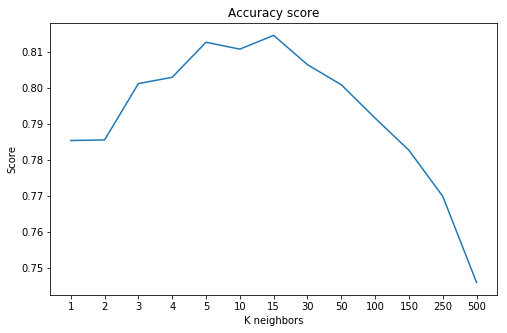

In [21]:
plt.plot(scores)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Score')
plt.title('Accuracy score')

### График ошибок на тренировочной выборке от числа ближайших соседей

Text(0.5, 1.0, 'Train Error')

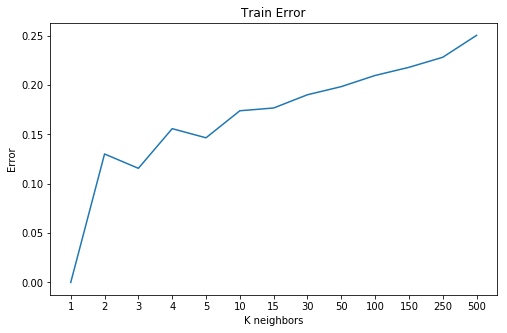

In [22]:
plt.plot(err_train)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Error')
plt.title('Train Error')

### График ошибок на тестовой выборке от числа ближайших соседей

Text(0.5, 1.0, 'Test Error')

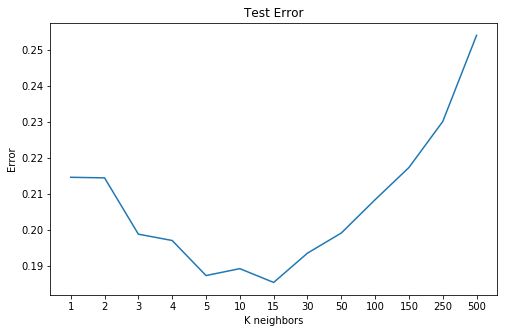

In [23]:
plt.plot(err_test)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Error')
plt.title('Test Error')

### Общий график

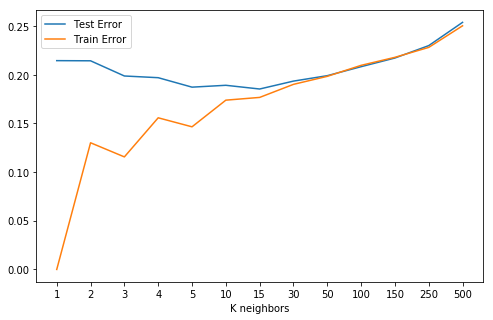

In [24]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.legend()

### Нормализация данных

In [25]:
X = scale(data.iloc[:,:-1])
y = data.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

### КNN + scale

In [27]:
scores = []
err_train = []
err_test = []
k_neighbors = [1,2,3,4,5,10,15,30,50,100,150,250,500]
for k in k_neighbors:
    start_time = datetime.datetime.now()
    
    model = KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_pred,y_test))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))
    
    print('k = ' + str(k))
    print('Time elapsed: ' + str(datetime.datetime.now() - start_time))
    print('Train error: ' + str(err_train[-1]))
    print('Test error: ' + str(err_test[-1]))
    print('Accuracy score: ' + str(scores[-1]))
    print()

k = 1
Time elapsed: 0:00:00.368297
Train error: 0.0
Test error: 0.17874780946311933
Accuracy score: 0.8212521905368807

k = 2
Time elapsed: 0:00:00.672048
Train error: 0.11771168484658244
Test error: 0.18065955074079976
Accuracy score: 0.8193404492592002

k = 3
Time elapsed: 0:00:00.676865
Train error: 0.09864239190143609
Test error: 0.1604269555520153
Accuracy score: 0.8395730444479848

k = 4
Time elapsed: 0:00:00.800022
Train error: 0.13434826963823276
Test error: 0.16648080293133663
Accuracy score: 0.8335191970686634

k = 5
Time elapsed: 0:00:00.881462
Train error: 0.12438201365455544
Test error: 0.15580691413095427
Accuracy score: 0.8441930858690457

k = 10
Time elapsed: 0:00:00.885737
Train error: 0.15059248214706114
Test error: 0.1599490202325952
Accuracy score: 0.8400509797674048

k = 15
Time elapsed: 0:00:00.984654
Train error: 0.14996468649454603
Test error: 0.1567627847697945
Accuracy score: 0.8432372152302056

k = 30
Time elapsed: 0:00:01.312938
Train error: 0.16212822726202

### График доли правильных ответов на тестовой выборке от числа ближайших соседей

Text(0.5, 1.0, 'Accuracy score')

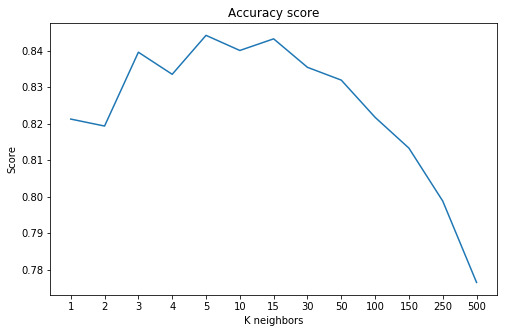

In [28]:
plt.plot(scores)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Score')
plt.title('Accuracy score')

### График ошибок на тренировочной выборке от числа ближайших соседей

Text(0.5, 1.0, 'Train Error')

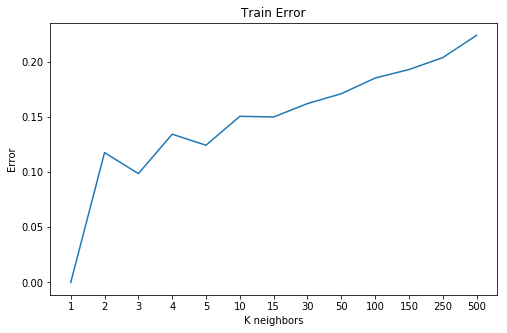

In [29]:
plt.plot(err_train)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Error')
plt.title('Train Error')

### График ошибок на тестовой выборке от числа ближайших соседей

Text(0.5, 1.0, 'Test Error')

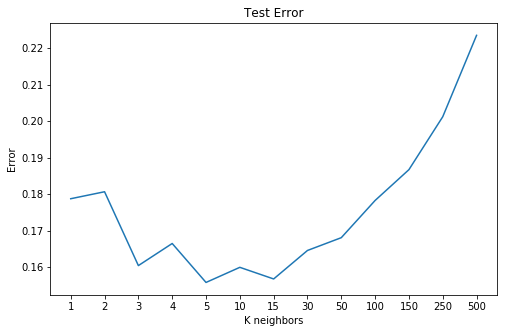

In [30]:
plt.plot(err_test)
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.ylabel('Error')
plt.title('Test Error')

### Общий график

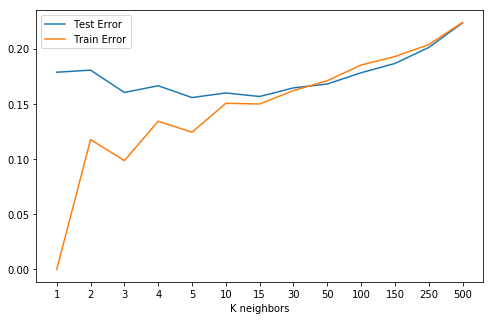

In [31]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(13),k_neighbors)
plt.xlabel('K neighbors')
plt.legend()

## Выводы
### Лучшие результаты
- **KNN** без предобработки при **k=15** *Accuracy* - **0.814561096065**
- **KNN** с нормализацией при **k=5** *Accuracy* - **0.844193085869**

Нормализация позволила улучшить *Accuracy* на **0.029631989804**.  

## Еще несколько методов машинного обучения

## SVM

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.13222945931099428 0.12617492432690774


## SVM + подбор гиперпараметров

In [61]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-3, 3)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.13277878050694503 10.0
0.11724083810719611 0.12123625935956667


## Random forest

In [32]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.11581965907280548


### Значимость признаков

In [33]:
feature_names = data.columns[:-1]
N, d = X.shape

np.sum(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Alpha' (0.232508)
 2. feature 'Length' (0.157325)
 3. feature 'Width' (0.117804)
 4. feature ' Size' (0.111521)
 5. feature 'M3Long' (0.090791)
 6. feature ' Dist' (0.067614)
 7. feature ' Conc' (0.063055)
 8. feature 'Conc1' (0.056021)
 9. feature 'M3Trans' (0.051765)
10. feature ' Asym' (0.051596)


(-1, 10)

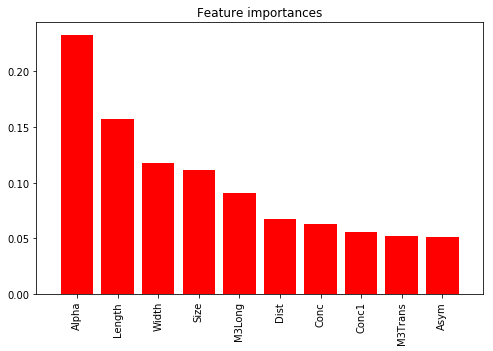

In [34]:
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], align = 'center', color = 'r')
plt.xticks(range(10), feature_names[indices[:10]], rotation = 90)
plt.xlim([-1, 10])

## Extremely Randomized Trees

In [49]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.1177314003504859


## AdaBoost

In [50]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.13058149572314212 0.1491158196590728


## GBT

In [51]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.051636192419367496 0.11581965907280548


# Нейронные сети, используя Keras

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pylab import rcParams

import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 12, 6
np.random.seed(13)

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.regularizers import l2

scores = []

Using TensorFlow backend.


### Выгрузим данные в Pandas DataFrame

In [4]:
data = pd.read_csv('../data/magic04.data',header=None)
data.columns = ['Length', 'Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','class']

In [5]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Описание данных
`1.  Length:  continuous  # major axis of ellipse [mm] `  
`2.  Width:   continuous  # minor axis of ellipse [mm] `  
`3.  Size:    continuous  # 10-log of sum of content of all pixels [in #phot] `  
`4.  Conc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]`  
`5.  Conc1:   continuous  # ratio of highest pixel over fSize  [ratio] `  
`6.  Asym:    continuous  # distance from highest pixel to center, projected onto major axis [mm] `  
`7.  M3Long:  continuous  # 3rd root of third moment along major axis  [mm] `  
`8.  M3Trans: continuous  # 3rd root of third moment along minor axis  [mm] `   
`9.  Alpha:   continuous  # angle of major axis with vector to origin [deg] `  
`10. Dist:    continuous  # distance from origin to center of ellipse [mm] `  
`11. class:    g,h         # gamma (signal), hadron (background) `  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
Length     19020 non-null float64
Width      19020 non-null float64
Size       19020 non-null float64
Conc       19020 non-null float64
Conc1      19020 non-null float64
Asym       19020 non-null float64
M3Long     19020 non-null float64
M3Trans    19020 non-null float64
Alpha      19020 non-null float64
Dist       19020 non-null float64
class      19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


### Разделим данные на обучающую и тестовую выборку

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1]
y = y.map({'g' : 1, 'h' : 0})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

Построим модель `полносвязной нейронной сети` c `одним` скрытым слоем и размером нейронов равным `16`.

In [9]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


### Посмотрим ошибку на тренировочной и тестовой выборке в зависимости от количества эпох для обучения

In [11]:
train_err_main = []
test_err_main = []

for i in tqdm(range(0,150)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

100%|██████████| 150/150 [00:52<00:00,  2.99it/s]


### График ошибок на тренировочной и тестовой выборке от количества эпох

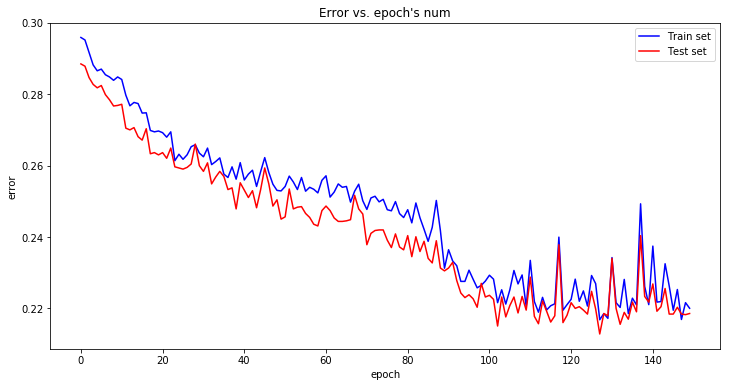

In [102]:
plt.plot(train_err_main, 'b', label = 'Train set')
plt.plot(test_err_main, 'r', label = 'Test set')
plt.title("Error vs. epoch's num")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

- Видно, что к ~100 эпохе модель сходится, а дальше начинает вести себя нестабильно

In [103]:
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_main == min(train_err_main))[0][0],"эпохе -", min(train_err_main))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_main == min(test_err_main))[0][0],"эпохе -", min(test_err_main))

Наименьшая ошибка на тренировочной выборке на 127 эпохе - 0.2168249234874049
Наименьшая ошибка на тестовой выборке на 127 эпохе - 0.21284052891508687


### Далее, будем менять параметр L2 регуляризации и обучать 100 эпох

In [16]:
train_err_l2 = []
test_err_l2 = []
for i in tqdm([10**_ for _ in range(3,-7,-1)]):
    model = Sequential()
    model.add(Dense(16, input_dim=10, activation='sigmoid', kernel_regularizer=l2(i)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(lr = 0.01)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics = ['accuracy'])
    model.fit(
        X_train, y_train, 
        batch_size = 32, 
        epochs = 100,
        verbose = 0
    )
    train_err_l2.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_l2.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

100%|██████████| 12/12 [11:18<00:00, 58.64s/it]


### График ошибок на тренировочной и тестовой выборке от L2 

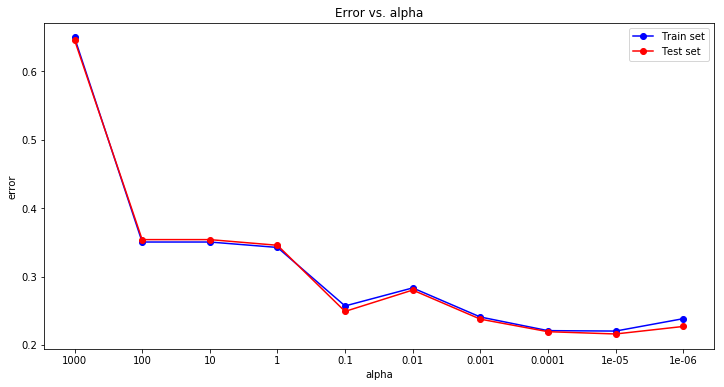

In [24]:
plt.plot(train_err_l2, 'b-o', label = 'Train set')
plt.plot(test_err_l2, 'r-o', label = 'Test set')
plt.title('Error vs. alpha')
plt.xticks(range(10),[10**_ for _ in range(3,-7,-1)])
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [25]:
print("Наименьшая ошибка на тренировочной выборке при alpha=1e-5","-", min(train_err_l2))
print("Наименьшая ошибка на тестовой выборке  при alpha=1e-5","-", min(test_err_l2))

Наименьшая ошибка на тренировочной выборке при alpha=1e-5 - 0.21407831750765127
Наименьшая ошибка на тестовой выборке  при alpha=1e-5 - 0.21268121714194677


### Обучим модель с полученным параметром alpha

In [35]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_main = []
test_err_main = []

for i in tqdm(range(0,150)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_main.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

100%|██████████| 150/150 [01:13<00:00,  2.27it/s]


### График ошибок на тренировочной и тестовой выборке от количества эпох

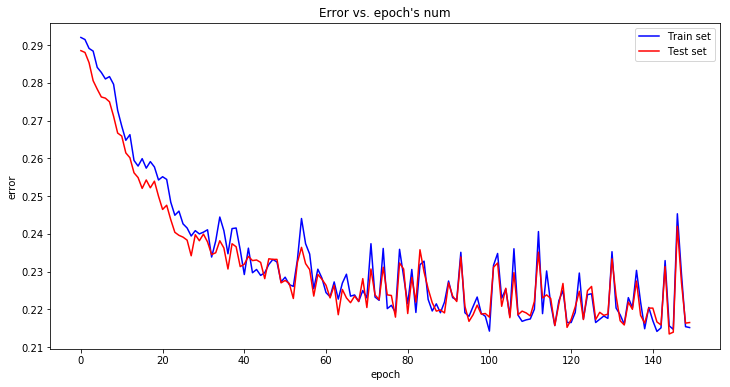

In [36]:
plt.plot(train_err_main, 'b', label = 'Train set')
plt.plot(test_err_main, 'r', label = 'Test set')
plt.title("Error vs. epoch's num")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

In [103]:
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_main == min(train_err_main))[0][0],"эпохе -", min(train_err_main))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_main == min(test_err_main))[0][0],"эпохе -", min(test_err_main))

Наименьшая ошибка на тренировочной выборке на 127 эпохе - 0.2168249234874049
Наименьшая ошибка на тестовой выборке на 127 эпохе - 0.21284052891508687


### Изменим модель, добавив еще один полносвязный слой с 32 нейронами

In [28]:
model = Sequential()
model.add(Dense(32, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_add = []
test_err_add = []

for i in tqdm(range(0,150)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_add.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_add.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

100%|██████████| 150/150 [01:16<00:00,  1.95it/s]


In [32]:
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_add == min(train_err_add))[0][0],"эпохе -", min(train_err_add))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_add == min(test_err_add))[0][0],"эпохе -", min(test_err_add))

Наименьшая ошибка на тренировочной выборке на 142 эпохе - 0.2157262810955034
Наименьшая ошибка на тестовой выборке на 135 эпохе - 0.2117253465031066


### График ошибок на тренировочной и тестовой выборке от количества эпох

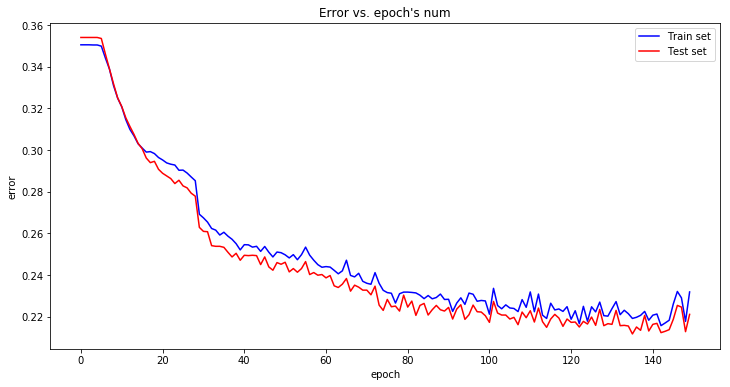

In [38]:
plt.plot(train_err_add, 'b', label = 'Train set')
plt.plot(test_err_add, 'r', label = 'Test set')
plt.title("Error vs. epoch's num")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

### Отобразим полученные результаты на одной графике

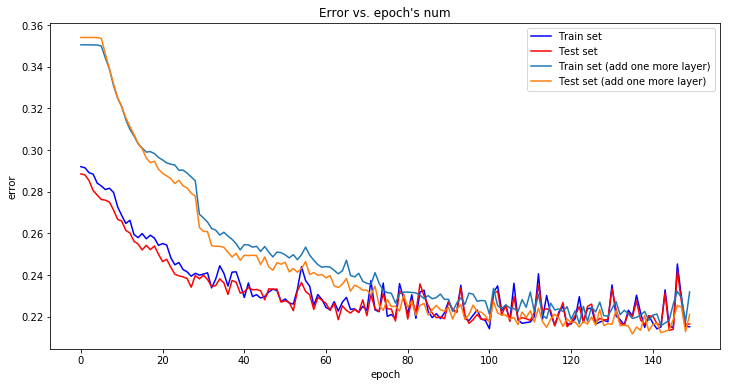

In [39]:
plt.plot(train_err_main, 'b', label = 'Train set')
plt.plot(test_err_main, 'r', label = 'Test set')
plt.plot(train_err_add, label = 'Train set (add one more layer)')
plt.plot(test_err_add, label = 'Test set (add one more layer)')

plt.title("Error vs. epoch's num")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

### Теперь обучим модель с одним слоем и количеством нейронов, равным 4, 8, 32, 64, 128, 256, 512, 1024, 2048, 4096

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_4 = []
test_err_4 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_4.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_4.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

#
model = Sequential()
model.add(Dense(8, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_8 = []
test_err_8 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_8.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_8.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(32, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_32 = []
test_err_32 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_32.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_32.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(64, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_64 = []
test_err_64 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_64.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_64.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(128, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_128 = []
test_err_128 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_128.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_128.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(256, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_256 = []
test_err_256 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_256.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_256.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(512, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_512 = []
test_err_512 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_512.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_512.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(1024, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_1024 = []
test_err_1024 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_1024.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_1024.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(2048, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_2048 = []
test_err_2048 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_2048.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_2048.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))
    
#
model = Sequential()
model.add(Dense(4096, input_dim=10, activation='sigmoid', kernel_regularizer=l2(1e-5)))
model.add(Dense(1, activation='sigmoid'))

optimizer = SGD(lr = 0.01)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics = ['accuracy'])

train_err_4096 = []
test_err_4096 = []

for i in tqdm(range(0,100)):
    model.fit(
        X_train, y_train, 
        batch_size = 128, 
        epochs = 1,
        verbose = 0
    )
    train_err_4096.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_train)],y_train))
    test_err_4096.append(1 - accuracy_score([i[0] for i in model.predict_classes(X_test)],y_test))

## Выводы и лучшие результаты 

In [54]:
print("Dense(16)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_main == min(train_err_main))[0][0],"эпохе -", min(train_err_main))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_main == min(test_err_main))[0][0],"эпохе -", min(test_err_main))
print()
print("Dense(32) + Dense(16)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_add == min(train_err_add))[0][0],"эпохе -", min(train_err_add))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_add == min(test_err_add))[0][0],"эпохе -", min(test_err_add))

print()
print("Dense(8)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_8 == min(train_err_8))[0][0],"эпохе -", min(train_err_8))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_8 == min(test_err_8))[0][0],"эпохе -", min(test_err_8))
print()
print("Dense(32)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_32 == min(train_err_32))[0][0],"эпохе -", min(train_err_32))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_32 == min(test_err_32))[0][0],"эпохе -", min(test_err_32))
print()
print("Dense(64)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_64 == min(train_err_64))[0][0],"эпохе -", min(train_err_64))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_64 == min(test_err_64))[0][0],"эпохе -", min(test_err_64))
print()
print("Dense(128)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_128 == min(train_err_128))[0][0],"эпохе -", min(train_err_128))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_128 == min(test_err_128))[0][0],"эпохе -", min(test_err_128))
print()
print("Dense(256)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_256 == min(train_err_256))[0][0],"эпохе -", min(train_err_256))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_256 == min(test_err_256))[0][0],"эпохе -", min(test_err_256))
print()
print("Dense(512)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_512 == min(train_err_512))[0][0],"эпохе -", min(train_err_512))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_512 == min(test_err_512))[0][0],"эпохе -", min(test_err_512))

print()
print("Dense(1024)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_1024 == min(train_err_1024))[0][0],"эпохе -", min(train_err_1024))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_1024 == min(test_err_1024))[0][0],"эпохе -", min(test_err_1024))

print()
print("Dense(2048)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_2048 == min(train_err_2048))[0][0],"эпохе -", min(train_err_2048))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_2048 == min(test_err_2048))[0][0],"эпохе -", min(test_err_2048))

print()
print("Dense(4096)")
print("Наименьшая ошибка на тренировочной выборке на",np.where(train_err_4096 == min(train_err_4096))[0][0],"эпохе -", min(train_err_4096))
print("Наименьшая ошибка на тестовой выборке на",np.where(test_err_4096 == min(test_err_4096))[0][0],"эпохе -", min(test_err_4096))

Dense(16)
Наименьшая ошибка на тренировочной выборке на 141 эпохе - 0.21415679196421566
Наименьшая ошибка на тестовой выборке на 144 эпохе - 0.21347777600764695

Dense(32) + Dense(16)
Наименьшая ошибка на тренировочной выборке на 142 эпохе - 0.2157262810955034
Наименьшая ошибка на тестовой выборке на 135 эпохе - 0.2117253465031066

Dense(8)
Наименьшая ошибка на тренировочной выборке на 99 эпохе - 0.26257553166444325
Наименьшая ошибка на тестовой выборке на 98 эпохе - 0.26286442568105783

Dense(32)
Наименьшая ошибка на тренировочной выборке на 98 эпохе - 0.20748646315624264
Наименьшая ошибка на тестовой выборке на 99 эпохе - 0.2071053050820456

Dense(64)
Наименьшая ошибка на тренировочной выборке на 99 эпохе - 0.2068586675037275
Наименьшая ошибка на тестовой выборке на 99 эпохе - 0.2071053050820456

Dense(128)
Наименьшая ошибка на тренировочной выборке на 96 эпохе - 0.19430275445342537
Наименьшая ошибка на тестовой выборке на 94 эпохе - 0.1956348574159631

Dense(256)
Наименьшая ошибка н

Как видим, увеличение количества нейронов уменьшают ошибку, однако с 2048 нейронов наблюдается переобучение и сложность сети начинает негативно влиять на качество классификации.  
- **Наименьшая ошибка** - *Dense(1024)* - 0.1663214911581966

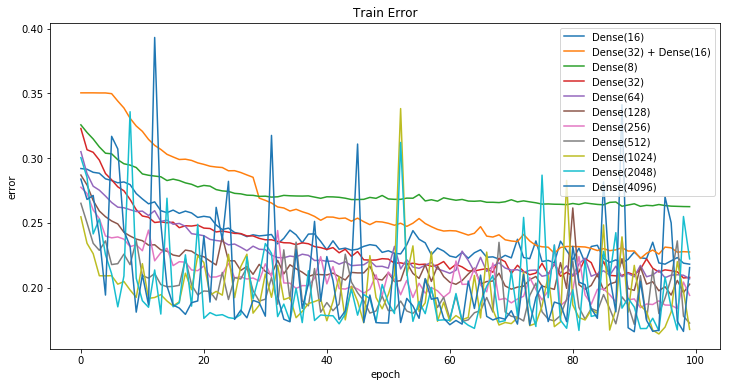

In [57]:
plt.plot(train_err_main[:100], label = 'Dense(16)')
plt.plot(train_err_add[:100], label = 'Dense(32) + Dense(16)')
plt.plot(train_err_8, label = 'Dense(8)')
plt.plot(train_err_32, label = 'Dense(32)')
plt.plot(train_err_64, label = 'Dense(64)')
plt.plot(train_err_128, label = 'Dense(128)')
plt.plot(train_err_256, label = 'Dense(256)')
plt.plot(train_err_512, label = 'Dense(512)')
plt.plot(train_err_1024, label = 'Dense(1024)')
plt.plot(train_err_2048, label = 'Dense(2048)')
plt.plot(train_err_4096, label = 'Dense(4096)')

plt.title("Train Error")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

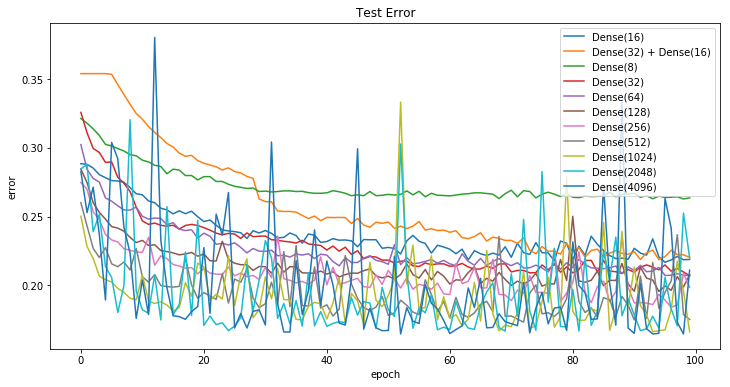

In [58]:
plt.plot(test_err_main[:100], label = 'Dense(16)')
plt.plot(test_err_add[:100], label = 'Dense(32) + Dense(16)')
plt.plot(test_err_8, label = 'Dense(8)')
plt.plot(test_err_32, label = 'Dense(32)')
plt.plot(test_err_64, label = 'Dense(64)')
plt.plot(test_err_128, label = 'Dense(128)')
plt.plot(test_err_256, label = 'Dense(256)')
plt.plot(test_err_512, label = 'Dense(512)')
plt.plot(test_err_1024, label = 'Dense(1024)')
plt.plot(test_err_2048, label = 'Dense(2048)')
plt.plot(test_err_4096, label = 'Dense(4096)')

plt.title("Test Error")
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()

In [ ]:
#     print('N_trees = ' + str(n_trees))
#     print('Time elapsed: ' + str(datetime.datetime.now() - start_time))
#     print('Train error: ' + str(err_train[-1]))
#     print('Test error: ' + str(err_test[-1]))
#     print('Accuracy score: ' + str(scores[-1]))
#     print()

In [10]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from pylab import rcParams
from tqdm import tqdm, tqdm_notebook

warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 16, 5

### Выгрузим данные в Pandas DataFrame и посмотрим на них

In [2]:
data = pd.read_csv('../data/magic04.data',header=None)
data.columns = ['Length', 'Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','class']

In [3]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Разделим данные на обучающую и тестовую выборку

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

# Random Forest

In [6]:
scores = []
err_train = []
err_test = []
oob_score = []
n_trees_ = [1,2,3,5,10,15,30,50,100,150,250,500,1000,10000,50000]

for n_trees in tqdm_notebook(n_trees_):
    start_time = datetime.datetime.now()
    
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n_trees, oob_score=True)
    model.fit(X_train,y_train)
    
    oob_score.append(model.oob_score_)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))

print('Maximum Out of Bag score \t {} with {} trees'.format(np.max(oob_score), n_trees_[np.argmax(oob_score)]))
print('Minimum train error \t {} with {} trees'.format(0.0, np.array(n_trees_)[np.where(np.array(err_train) == 0)[0]]))
print('Minimum test error \t {} with {} trees'.format(np.min(err_test), n_trees_[np.argmin(err_test)]))


Maximum Out of Bag score 	 0.8792278113474065 with 50000 trees
Minimum train error 	 0.0 with [  100   150   250   500  1000 10000 50000] trees
Minimum test error 	 0.11231480006372471 with 500 trees


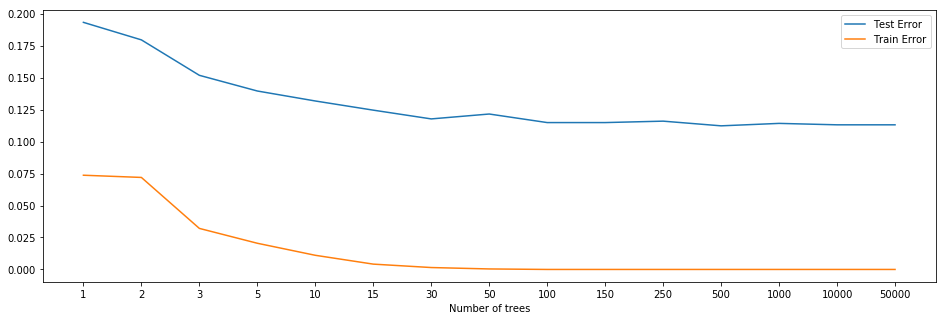

In [11]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(len(n_trees_)),n_trees_)
plt.xlabel('Number of trees')
plt.legend()

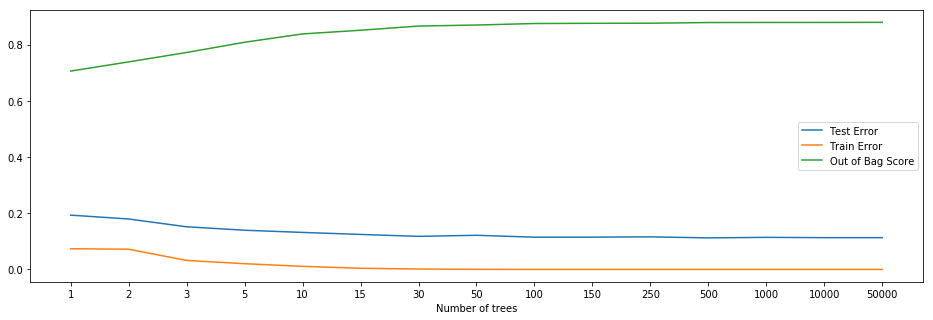

In [12]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.plot(oob_score, label = 'Out of Bag Score')
plt.xticks(range(len(n_trees_)),n_trees_)
plt.xlabel('Number of trees')
plt.legend()

- Видно, что модель полностью сходится (ошибка на тренировочной выборке нулевая) со 100 деревьев. Увеличение количества деревьев не ухудшает качество на тренировочной выборке, а так же не ухудшает обобщаю способность - видно, что модель не переобучается. Лучшее качество на тестовых данных достигается при количестве деревьев - равным 500.

# Extremely Random Forest

In [6]:
scores = []
err_train = []
err_test = []
oob_score = []
n_trees_ = [1,2,3,5,10,15,30,50,100,150,250,500,1000,10000,50000]

for n_trees in tqdm_notebook(n_trees_):
    start_time = datetime.datetime.now()
    
    model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_trees, oob_score=True, bootstrap=True)
    model.fit(X_train,y_train)
    
    oob_score.append(model.oob_score_)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))

print('Maximum Out of Bag score \t {} with {} trees'.format(np.max(oob_score), n_trees_[np.argmax(oob_score)]))
print('Minimum train error \t {} with {} trees'.format(0.0, np.array(n_trees_)[np.where(np.array(err_train) == 0)[0]]))
print('Minimum test error \t {} with {} trees'.format(np.min(err_test), n_trees_[np.argmin(err_test)]))


Maximum Out of Bag score 	 0.8742054461272856 with 10000 trees
Minimum train error 	 0.0 with [  100   150   250   500  1000 10000 50000] trees
Minimum test error 	 0.11709415325792576 with 10000 trees


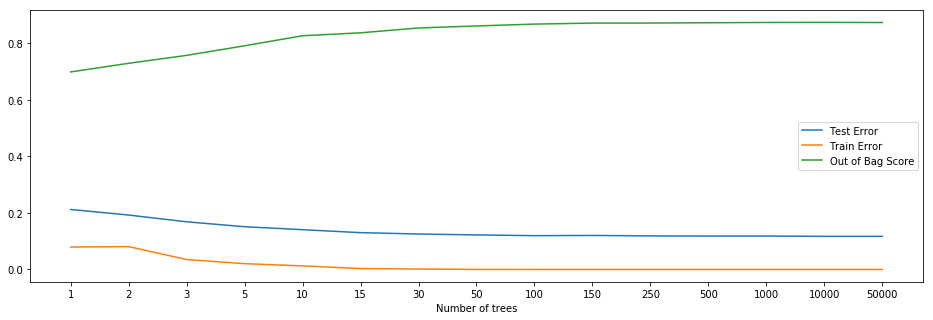

In [15]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.plot(oob_score, label = 'Out of Bag Score')
plt.xticks(range(len(n_trees_)),n_trees_)
plt.xlabel('Number of trees')
plt.legend()

- Видно, что модель полностью сходится, начиная с количества деревьев равным 100. Увеличение количества деревьев не ухудшает качество на тренировочной выборке, а так же не ухудшает обобщаю способность - видно, что модель не переобучается. Лучшее качество на тестовых данных достигается при количестве деревьев - равным 10000, что достаточно много, при этом качество ниже, чем у лучшей модели **Random Forest**.

# AdaBoost

In [38]:
scores = []
err_train = []
err_test = []
n_trees_ = [1,2,3,5,10,15,30,50,100,150,250,500,1000,10000,50000]

for n_trees in tqdm_notebook(n_trees_):
    start_time = datetime.datetime.now()
    
    model = AdaBoostClassifier(n_estimators=n_trees)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))

print('Minimum train error \t {} with {} trees'.format(np.min(err_train), n_trees_[np.argmin(err_train)]))
print('Minimum test error \t {} with {} trees'.format(np.min(err_test), n_trees_[np.argmin(err_test)]))

Minimum train error 	 0.04716314839519736 with 50000 trees
Minimum test error 	 0.14417715469173173 with 150 trees


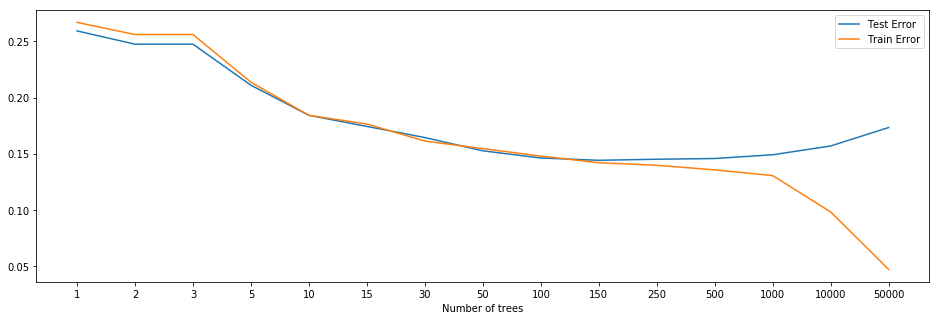

In [40]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(len(n_trees_)),n_trees_)
plt.xlabel('Number of trees')
plt.legend()

- В отличие от Random Forest модель AdaBoost не сходится полностью (в предыдущих моделях мы могли наблюдать, что ошибка на тренировочной отсутствовала полностью). Увеличение количества деревьев способствуют сходимости на тренировочной выборке (ошибка уменьшается с увеличением количества деревьев), однако, с 150 деревьев, видно, что модель переобучается (ошибка увеличивается). Лучшее качество на тестовых данных достигается при количестве деревьев - равным 150, однако не дотягивает до качества модели **Random Forest**. Это весьма объяснимо - модель не может оферфитнуться на тренировочных данных, а значит и не может показать лучшее качество на тестовых.

# GradientBoosting Trees

In [41]:
scores = []
err_train = []
err_test = []
n_trees_ = [1,2,3,5,10,15,30,50,100,150,250,500,1000,10000,50000]

for n_trees in tqdm_notebook(n_trees_):
    start_time = datetime.datetime.now()
    
    model = GradientBoostingClassifier(n_estimators=n_trees)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(X_train) != y_train))

print('Minimum train error \t {} with {} trees'.format(np.min(err_train), n_trees_[np.argmin(err_train)]))
print('Minimum test error \t {} with {} trees'.format(np.min(err_test), n_trees_[np.argmin(err_test)]))

Minimum train error 	 0.0 with 10000 trees
Minimum test error 	 0.11613828261908556 with 500 trees


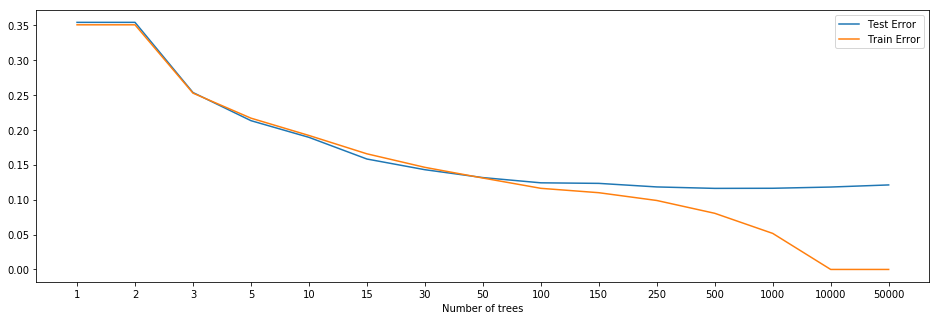

In [42]:
plt.plot(err_test, label = 'Test Error')
plt.plot(err_train, label = 'Train Error')
plt.xticks(range(len(n_trees_)),n_trees_)
plt.xlabel('Number of trees')
plt.legend()

- Видно, что модель полностью сходится, начиная с количества деревьев равным 10000. Увеличение количества деревьев способствуют сходимости на тренировочной выборке (ошибка уменьшается с увеличением количества деревьев), однако, с 500 деревьев, видно, что модель переобучается (ошибка увеличивается). Лучшее качество на тестовых данных достигается при количестве деревьев - равным 500, однако не дотягивает до качества модели **Random Forest**, хотя и весьма близко.

# Общие результаты

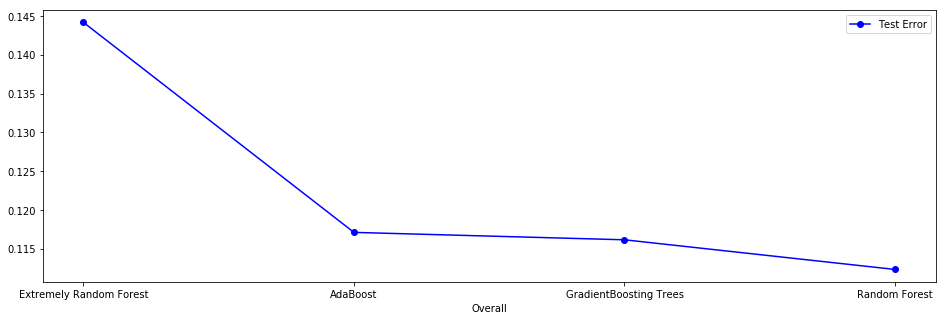

In [65]:
plt.plot([0.11231480006372471, 0.11613828261908556, 0.11709415325792576, 0.14417715469173173][::-1], 'b-o', label = 'Test Error')
plt.xticks(range(4),['Random Forest', 'GradientBoosting Trees', 'AdaBoost', 'Extremely Random Forest' ][::-1])
plt.xlabel('Overall')
plt.legend()

### Результаты

**Random Forest** - 0.11231480006372471  
**GradientBoosting Trees** - 0.11613828261908556  
**AdaBoost** - 0.11709415325792576  
**Extremely Random Forest** - 0.14417715469173173

# Значимость признаков

## Random Forest

Feature ranking:
Top 1. feature 'Alpha '(0.23333808826514885)'
Top 2. feature 'Length '(0.15473018765607235)'
Top 3. feature 'Width '(0.12490770079214909)'
Top 4. feature 'Size '(0.11206647482058614)'
Top 5. feature 'M3Long '(0.088731332200668)'
Top 6. feature 'Dist '(0.06766831466218733)'
Top 7. feature 'Conc '(0.060673920218452755)'
Top 8. feature 'Conc1 '(0.05574367253736382)'
Top 9. feature 'M3Trans '(0.051133136204264795)'
Top 10. feature 'Asym '(0.05100717264310656)'


<BarContainer object of 10 artists>

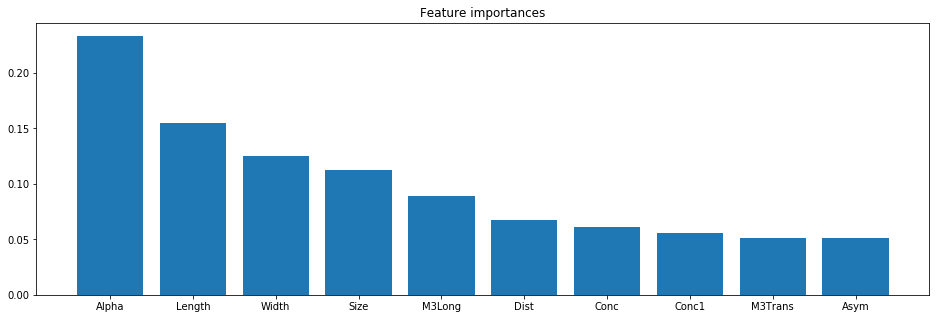

In [49]:
model = RandomForestClassifier(n_jobs=-1,n_estimators=500, oob_score=True)
model.fit(X_train,y_train)

feature_names = data.columns[:-1]
importances = model.feature_importances_
sorted_args = np.argsort(importances)[::-1]

print("Feature ranking:")
for _, idx in enumerate(sorted_args):
    print("Top {}. feature '{} '({})'".format(_ + 1, feature_names[idx], importances[idx]))

plt.title("Feature importances")
plt.bar(feature_names[sorted_args[:10]], importances[sorted_args[:10]], align = 'center')

## Extremely Random Forest

Feature ranking:
Top 1. feature 'Alpha '(0.2544892367358194)'
Top 2. feature 'Length '(0.12455547147559633)'
Top 3. feature 'Width '(0.10960354932118264)'
Top 4. feature 'Size '(0.10572590393491428)'
Top 5. feature 'M3Long '(0.08399940092595598)'
Top 6. feature 'Dist '(0.07074197669307318)'
Top 7. feature 'Conc '(0.06797816707494593)'
Top 8. feature 'Conc1 '(0.06273468512550397)'
Top 9. feature 'Asym '(0.06126889087274201)'
Top 10. feature 'M3Trans '(0.058902717840266405)'


<BarContainer object of 10 artists>

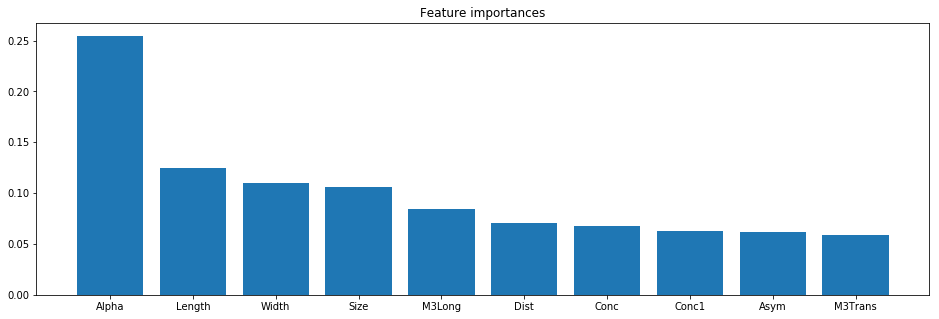

In [50]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators=10000, oob_score=True, bootstrap=True)
model.fit(X_train,y_train)

feature_names = data.columns[:-1]
importances = model.feature_importances_
sorted_args = np.argsort(importances)[::-1]

print("Feature ranking:")
for _, idx in enumerate(sorted_args):
    print("Top {}. feature '{} '({})'".format(_ + 1, feature_names[idx], importances[idx]))

plt.title("Feature importances")
plt.bar(feature_names[sorted_args[:10]], importances[sorted_args[:10]], align = 'center')

## AdaBoost

Feature ranking:
Top 1. feature 'Width '(0.2)'
Top 2. feature 'Alpha '(0.15333333333333332)'
Top 3. feature 'Length '(0.15333333333333332)'
Top 4. feature 'Size '(0.13333333333333333)'
Top 5. feature 'M3Long '(0.10666666666666667)'
Top 6. feature 'Conc '(0.08)'
Top 7. feature 'Asym '(0.06666666666666667)'
Top 8. feature 'Dist '(0.04)'
Top 9. feature 'M3Trans '(0.04)'
Top 10. feature 'Conc1 '(0.02666666666666667)'


<BarContainer object of 10 artists>

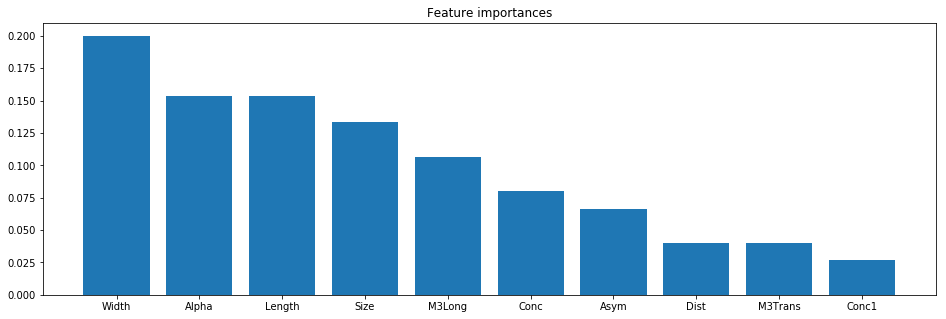

In [51]:
model = AdaBoostClassifier(n_estimators=150)
model.fit(X_train,y_train)

feature_names = data.columns[:-1]
importances = model.feature_importances_
sorted_args = np.argsort(importances)[::-1]

print("Feature ranking:")
for _, idx in enumerate(sorted_args):
    print("Top {}. feature '{} '({})'".format(_ + 1, feature_names[idx], importances[idx]))

plt.title("Feature importances")
plt.bar(feature_names[sorted_args[:10]], importances[sorted_args[:10]], align = 'center')

## GradientBoosting Trees

Feature ranking:
Top 1. feature 'Alpha '(0.3381399078328852)'
Top 2. feature 'Length '(0.25180045435639664)'
Top 3. feature 'Width '(0.12051190478500447)'
Top 4. feature 'Size '(0.11261770563348268)'
Top 5. feature 'M3Long '(0.05076280692870802)'
Top 6. feature 'Dist '(0.047825176491418216)'
Top 7. feature 'Conc '(0.028229041891958514)'
Top 8. feature 'Conc1 '(0.026808146707020104)'
Top 9. feature 'Asym '(0.012508823184226268)'
Top 10. feature 'M3Trans '(0.01079603218889999)'


<BarContainer object of 10 artists>

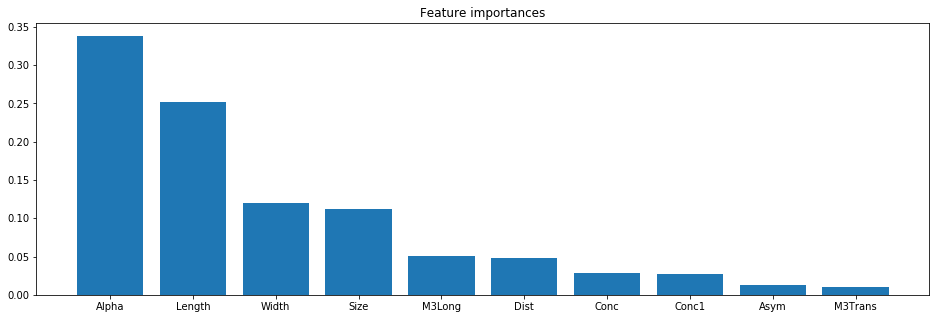

In [52]:
model = GradientBoostingClassifier(n_estimators=500)
model.fit(X_train,y_train)

feature_names = data.columns[:-1]
importances = model.feature_importances_
sorted_args = np.argsort(importances)[::-1]

print("Feature ranking:")
for _, idx in enumerate(sorted_args):
    print("Top {}. feature '{} '({})'".format(_ + 1, feature_names[idx], importances[idx]))

plt.title("Feature importances")
plt.bar(feature_names[sorted_args[:10]], importances[sorted_args[:10]], align = 'center')

# PCA

In [3]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from pylab import rcParams
from tqdm import tqdm, tqdm_notebook

warnings.simplefilter('ignore')
rcParams['figure.figsize'] = 16, 5

### Выгрузим данные в Pandas DataFrame и посмотрим на них

In [123]:
data = pd.read_csv('../data/magic04.data',header=None)
data.columns = ['Length', 'Width','Size','Conc','Conc1','Asym','M3Long','M3Trans','Alpha','Dist','class']

In [124]:
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Разделим данные на обучающую и тестовую выборку

In [148]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

In [28]:
scores = []
err_train = []
err_test = []

n_components = list(range(1, X.shape[1] + 1))

for i in tqdm_notebook(n_components):
    pca = PCA(n_components=i)
    model = RandomForestClassifier(n_jobs=-1, n_estimators=500)
    model.fit(pca.fit_transform(X_train), y_train)
    y_pred = model.predict(pca.transform(X_test))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(pca.transform(X_train)) != y_train))
    
    scores.append(accuracy_score(y_test, y_pred))

In [36]:
n_components = list(range(1, X.shape[1] + 1))
n_components.append('original_data')
model = RandomForestClassifier(n_jobs=-1,n_estimators=500)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
    
err_test.append(np.mean(y_pred != y_test))
err_train.append(np.mean(model.predict(X_train) != y_train))

Minimum train error 	 0.0 with ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' 'original_data'] components
Minimum test error 	 0.1263342361000478 with 10 components
Minimum test error 	 0.11231480006372471 on original_data


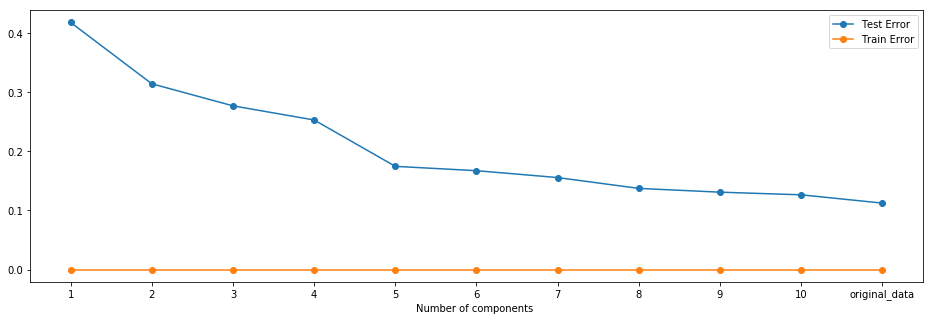

In [42]:
print('Minimum train error \t {} with {} components'.format(0.0, np.array(n_components[:])[np.where(np.array(err_train) == 0)[0]]))
print('Minimum test error \t {} with {} components'.format(np.min(err_test[:-1]), n_components[:-1][np.argmin(err_test[:-1])]))
print('Minimum test error \t {} on {}'.format(np.min(err_test), n_components[np.argmin(err_test)]))

plt.plot(err_test, '-o', label = 'Test Error')
plt.plot(err_train,'-o', label = 'Train Error')
plt.xticks(range(len(n_components)),n_components)
plt.xlabel('Number of components ')
plt.legend()

# Результаты

- **Random Forest** with **500** trees on **original_data** - 0.11231480006372471  
- **Random Forest** with **500** trees with **10 components** - 0.1263342361000478

Видно, что использование PCA не улучшило результат, полученный на оригинальных данных, лучший результат с использованием PCA был достигнут при максимальном наборе компонент. Так же стоит отметить, что при минимально возможном количестве компонент ошибка на тренировочной выборке равна нулю. Кроме того, наблюдается тенденция - с ростом количества компонент уменьшается ошибка на тестовой выборке. Так же стоит заметить, что при значении количества компонент, установленным 5 ошибка на тестовой выборке *не слишком сильно* отличается от лучшего результата. Таким образом можно сократить размерность признаков с *не очень большой* потерей качества.

Не удивительно, что использование PCA в связке с Random Forest не снизило ошибку.  
Гипотеза - использование PCA с моделью может уменьшить ошибку, если не использовать PCA

In [149]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=7)

n_components = list(range(1, X.shape[1] + 1))
scores = []
err_train = []
err_test = []

for i in tqdm_notebook(n_components):
    pca = PCA(n_components=i)
    model = LogisticRegression()
    model.fit(pca.fit_transform(X_train), y_train)
    y_pred = model.predict(pca.transform(X_test))
    
    err_test.append(np.mean(y_pred != y_test))
    err_train.append(np.mean(model.predict(pca.transform(X_train)) != y_train))
    
    scores.append(accuracy_score(y_test, y_pred))
    
n_components = list(range(1, X.shape[1] + 1))
n_components.append('original_data')
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
    
err_test.append(np.mean(y_pred != y_test))
err_train.append(np.mean(model.predict(X_train) != y_train))

Minimum train error 	 0.21078239033194696 with original_data components
Minimum test error 	 0.20025489883702405 with 7 components


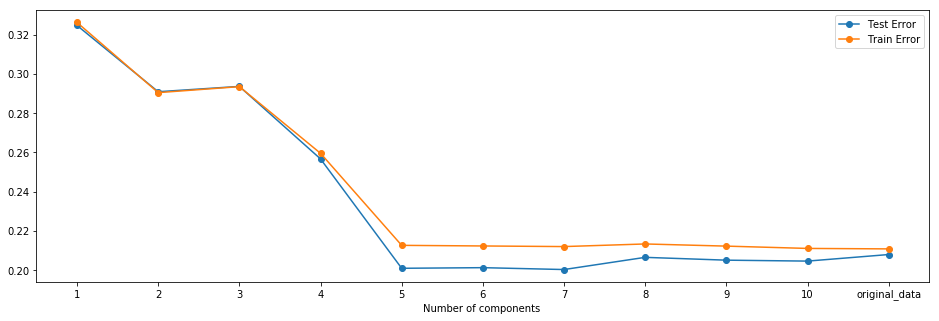

In [150]:
print('Minimum train error \t {} with {} components'.format(np.min(err_train), n_components[np.argmin(err_train)]))
print('Minimum test error \t {} with {} components'.format(np.min(err_test), n_components[np.argmin(err_test)]))

plt.plot(err_test, '-o', label = 'Test Error')
plt.plot(err_train,'-o', label = 'Train Error')
plt.xticks(range(len(n_components)),n_components)
plt.xlabel('Number of components ')
plt.legend()

Видно, что ошибка при использовании Логистической регрессии выше, чем ошибка, при использовании модели Случайного Леса, однако, несмотря на этот факт - гипотеза подтвердилась. Действительно, использование PCA помогает снизить ошибку. Ошибка на тестовой выборке с использованием PCA и количеством компонент, равным 7, меньше, чем ошибка Логистической Регрессии на исходных данных